# <center>Интерполяция.Сплайны</center>
###  <center>Лабораторная работа №2</center>

#### 1. Введение
1. Запишем нашу сетку
2. Визуализируем её

In [1]:
from matplotlib import pyplot as plt
import numpy as np

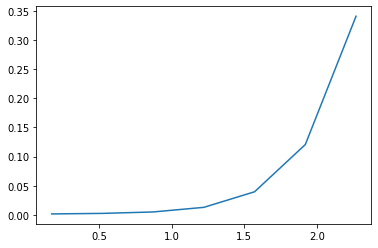

In [2]:
x = [0.17453, 0.5236, 0.87267, 1.22173, 1.5708, 1.91986, 2.26893]
y = [0.00162, 0.00252, 0.00498, 0.0129, 0.03964, 0.1207, 0.34097]
plt.plot(x, y)

#### 2. Метод построения через МНК

In [3]:
def squared_error(y, poly): #Квадратичная ошибка
    y = np.array(y)
    poly = np.array(poly)
    return (y - poly).dot(y - poly)

In [4]:
def grad_descent(x, y, n=3, num_iter = 1000000, eta=0.01): # Градиентный спуск для нахождения минимума ошибки
    x = np.array(x)
    y = np.array(y)
    w = np.zeros(n+1)
    X = np.ones(len(x))
    for i in range(1, n+1):
        X = np.vstack((X, np.array(x)**i)) #Создаем матрицу значений в столбцах значения x, x^2, x^3
    iter_num = 0
    while(squared_error(y, X.T.dot(w)) > 10**(-4)):
        w_prev = w.copy()
        w -= 2*eta/len(y)*X.dot(X.T.dot(w) - y)
        if((w_prev - w).dot(w_prev - w) < 10**(-20)):
            break
        iter_num += 1
    print('sqr error:', squared_error(y, X.T.dot(w)))
    print('iters:', iter_num)
    return w

In [5]:
w = grad_descent(x, y)

sqr error: 0.0005549594619722242
iters: 320862


In [6]:
X = np.ones(len(x))
for i in range(1, 3+1):
    X = np.vstack((X, np.array(x)**i))
new_y = X.T.dot(w)

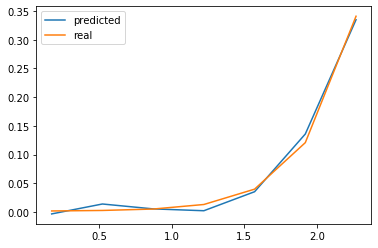

In [7]:
plt.plot(x, new_y, label='predicted')
plt.plot(x, y, label='real')
plt.legend()

#### 3. Многочлен в форме Ньютона

In [8]:
def newton_poly(b, x0, a):
    poly = b[0] + b[1]*(x0 - a[0]) + b[2]*(x0 - a[0])*(x0 - a[1]) + b[3]*(x0 - a[0])*(x0 - a[1])*(x0 - a[2])
    poly += b[4]*(x0 - a[0])*(x0 - a[1])*(x0 - a[2])*(x0 - a[3])
    poly += b[5]*(x0 - a[0])*(x0 - a[1])*(x0 - a[2])*(x0 - a[3])*(x0 - a[4])
    poly += b[6]*(x0 - a[0])*(x0 - a[1])*(x0 - a[2])*(x0 - a[3])*(x0 - a[4])*(x0 - a[5])
    return poly

In [9]:
b0 = y
b1 = []
for i in range(1, 7):
    b1.append((y[i] - y[i-1])/(x[i] - x[i-1]))
b2 = []
for i in range(1, 6):
    b2.append((b1[i] - b1[i-1])/(x[i+1] - x[i-1]))
b3 = []
for i in range(1, 5):
    b3.append((b2[i] - b2[i-1])/(x[i+2] - x[i-1]))
b4 = []
for i in range(1, 4):
    b4.append((b3[i] - b3[i-1])/(x[i+3] - x[i-1]))
b5 = []
for i in range(1, 3):
    b5.append((b4[i] - b4[i-1])/(x[i+4] - x[i-1]))
b6 = (b5[1] - b5[0])/(x[6] - x[0])

In [10]:
b = [b0[0], b1[0], b2[0], b3[0], b4[0], b5[0], b6]
x0 = np.array(x)
print('Значение многочлена Ньютона в точках заданных:', newton_poly(b, x0, a=x))
print('Зачения заданных y:', y)

Значение многочлена Ньютона в точках заданных: [0.00162 0.00252 0.00498 0.0129  0.03964 0.1207  0.34097]
Зачения заданных y: [0.00162, 0.00252, 0.00498, 0.0129, 0.03964, 0.1207, 0.34097]


Как видим полностью совпадает с нашими изначальными y

#Производная многочлена Ньютона:
def derirative(b, x0, a):
    poly = b[1] + b[2]*(x0 - a[1]) + b[2]*(x0 - a[0])
    
    poly += b[3]*(x0 - a[0])*(x0 - a[1]) + b[3]*(x0 - a[0])*(x0 - a[2]) + b[3]*(x0 - a[2])*(x0 - a[1])
    
    poly += b[4]*(x0 - a[1])*(x0 - a[2])*(x0 - a[3]) + b[4]*(x0 - a[0])*(x0 - a[2])*(x0 - a[3])
    poly += b[4]*(x0 - a[0])*(x0 - a[1])*(x0 - a[3]) + b[4]*(x0 - a[0])*(x0 - a[1])*(x0 - a[2])
    
    poly += b[5]*(x0 - a[1])*(x0 - a[2])*(x0 - a[3])*(x0 - a[4]) + b[5]*(x0 - a[0])*(x0 - a[2])*(x0 - a[3])*(x0 - a[4])
    poly += b[5]*(x0 - a[0])*(x0 - a[1])*(x0 - a[3])*(x0 - a[4]) + b[5]*(x0 - a[0])*(x0 - a[1])*(x0 - a[2])*(x0 - a[4])
    poly += b[5]*(x0 - a[0])*(x0 - a[1])*(x0 - a[2])*(x0 - a[3])
    
    poly += b[6]*(x0 - a[1])*(x0 - a[2])*(x0 - a[3])*(x0 - a[4])*(x0 - a[5])
    poly += b[6]*(x0 - a[0])*(x0 - a[2])*(x0 - a[3])*(x0 - a[4])*(x0 - a[5])
    poly += b[6]*(x0 - a[0])*(x0 - a[1])*(x0 - a[3])*(x0 - a[4])*(x0 - a[5])
    poly += b[6]*(x0 - a[0])*(x0 - a[1])*(x0 - a[2])*(x0 - a[4])*(x0 - a[5])
    poly += b[6]*(x0 - a[0])*(x0 - a[1])*(x0 - a[2])*(x0 - a[3])*(x0 - a[5])
    poly += b[6]*(x0 - a[0])*(x0 - a[1])*(x0 - a[2])*(x0 - a[3])*(x0 - a[4])
    
    return poly

In [46]:
X = np.ones(len(x))
for i in range(1, 6+1):
    X = np.vstack((X, np.array(x)**i))
A = np.linalg.inv(X.T) @ y
def poly_6(A, x):
    return A[0] + A[1]*x + A[2]*(x**2) + A[3]*(x**3) + A[4]*(x**4) + A[5]*(x**5) + A[6]*(x**6)
def derirative(A, x):
    return A[1] + 2*A[2]*x + 3*A[3]*(x**2) + 4*A[4]*(x**3) + 5*A[5]*(x**4) + 6*A[6]*(x**5)

#### 4. Построение сплайнов

In [80]:
def spline(a, x):
    return a[3] + a[2]*x + a[1]*(x**2) + a[0]*(x**3)
def spline_coef_(x1, x2, y1, y2):
    a0 = (-derirative(A, x2) * (x1**2) * x2 * (x2 - x1) + y2*(x1**2)*(3*x2 - x1))/((x2 - x1)**3)
    a0 += (y1*(x2**2)*(x2 - 3*x1) - derirative(A, x1)*x1*(x2**2)*(x2 - x1))/((x2 - x1)**3)
    
    a1 = (derirative(A, x2)*x1*(2*x2 + x1)*(x2 - x1) - 6*(y2 - y1)*x1*x2)/((x2 - x1)**3)
    a1 += (derirative(A, x1)*x2*(x2 + 2*x1)*(x2 - x1))/((x2 - x1)**3)
    
    a2 = (-derirative(A, x2)*(x2 - x1)*(x2 + 2*x1) + 3*(y2 - y1)*(x2 + x1))/((x2 - x1)**3)
    a2 -= (derirative(A, x1)*(x2 - x1)*(x1 + 2*x2))/((x2 - x1)**3)
    
    a3 = (derirative(A, x2)*(x2 - x1) - 2*(y2 - y1) + derirative(A, x1))/((x2 - x1)**3)
    a = [a0, a1, a2, a3]
    return a

In [81]:
def X_arr(x1, x2):
    return np.array([[x1**3, x2**3, 3*(x1**2), 3*(x2**2)], [x1**2, x2**2, 2*x1, 2*x2], 
                     [x1, x2, 1, 1], [1, 1, 0, 0]])
def P(x1, x2, A):
    return np.array([poly_6(A, x1), poly_6(A, x2), derirative(A, x1), derirative(A, x2)])
def spline_coef(x1, x2, A):
    X_ = X_arr(x1, x2)
    b = P(x1, x2, A)
    return np.linalg.inv(X_.T) @ b

In [193]:
#Тестовый пример
# НЕ ЗАПУСКАТЬ (не получится :))
def poly(x):
    return x**2 + x
def derirative(b, x, x_):
    return 2*x + x
a = spline_coef(1, 2, poly(1), poly(2), [1, 1], [1, 2])
new_y = spline(a, np.array([1, 2]))
print('Spline y:', new_y)
print('Real y:', [poly(1), poly(2)])

Spline y: [2. 6.]
Real y: [2, 6]


Получается все верно

Сплайн между точками 0.5236 и 0.87267 : -0.002036x^3 + 0.017013x^2 + -0.024260x + 0.016016


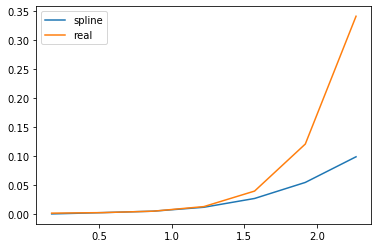

In [82]:
def spline_print(x1, x2, y1, y2,):
    a = spline_coef(x1, x2, A)
    print('Сплайн между точками', x1, 'и', x2, ':', 
          '{:f}x^3 + {:f}x^2 + {:f}x + {:f}'.format(a[3], a[2], a[1], a[0]))
    new_y = spline(a, np.array(x))
    plt.plot(x, new_y, label='spline')
    plt.plot(x, y, label='real')
    plt.legend()
spline_print(x[1], x[2], y[1], y[2])